A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

# **Upload the main Time Series Files:-**

**statsmodels.tsa.seasonal (seasonal_decompose):** This module from the statsmodels library provides tools for decomposing time series data into its components: trend, seasonal, and residual.

**statsmodels.tsa.stattools (acf, pacf):** These functions are used for computing the autocorrelation function (ACF) and the partial autocorrelation function (PACF), which are essential tools for analyzing autocorrelation patterns in time series data.

**statsmodels.tsa.arima_model (ARIMA):** This module from the statsmodels library implements the ARIMA (AutoRegressive Integrated Moving Average) model, which is a widely used approach for modeling and forecasting time series data. ARIMA models combine autoregressive (AR), differencing (I), and moving average (MA) components.

**In this tutorial, we will learn how to make a dataset stationary using the rolling window method, and subsequently evaluate the performance of ARIMA and SARIMA models on the dataset.**

Ness. lib

In [1]:
import pandas as pd  #data manipuation   panel data
import numpy as np  #numerical python
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns #visualisation

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data - This dataset provides monthly totals of a US airline passengers from 1949 to 1960.

data = pd.read_csv(r'D:\intellipaat ds ai ml\DS@AI\5 ml\06-22,23 Time series iit prof/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [60]:
#EDA on the time series data
data.head()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [61]:
data.shape

(144, 2)

In [62]:
12*12   #12 years data

144

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m') #converting month column to date time

In [65]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: >

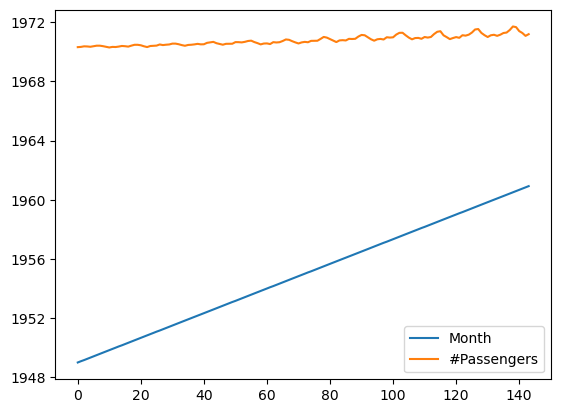

In [67]:
data.plot()

In [4]:
data.index=data['Month']  # or data= data.set_index('Month') #making month as index column

In [69]:
data

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [5]:
del data['Month']
# data['Month'] = pd.to_datetime(data['Month'])
# data.index = data['Month']   # or data= data.set_index('Month')
# del data['Month']

In [71]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
data.describe() #**Analyse the statistical function of the Dataset through Describe()**

<Axes: xlabel='Month'>

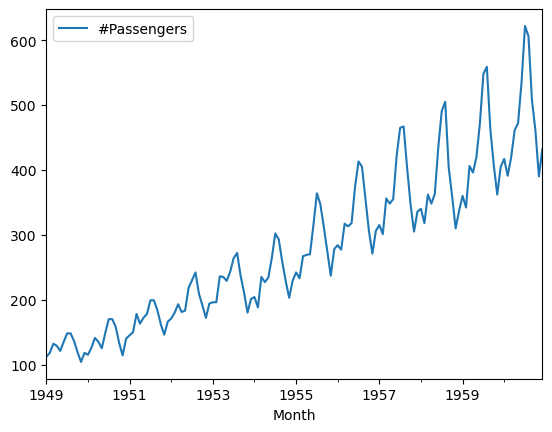

In [72]:
data.plot()

The **rolling technique** is often used to smooth out fluctuations, identify trends, or compute statistics that change over time.
+ Calculates **the rolling mean** of the time series data using a window size of 12. to identify trends or patterns in the data that might not be obvious from the raw data.
+ calculates **the rolling standard deviation** of the time series data with a window size of 12.Standard deviation is a measure of the dispersion or variability of the data points.

Rolling average = sum of data over time / time period

To discover the trend, a rolling average uses smaller parts of the data.

Use rolling() to calculate the rolling mean of a column

The default argument for the rolling() is called window , and is an int specifying the number of rows to use. We'll use rolling() to calculate rolling means or rolling averages for the conversion_rate column.

In [6]:
mean_log=data.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=data.rolling(window=12).std()

# since window size = 12, first 11 values NAN( there are no 11 values before),
# 12 th value is mean of 12 values. then 2-13, 3-14, 4-15 values mean and so on


plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

# legend(loc='best') -->  location of legend in graph
# loc='best' ..default at upper left for other positions refer notes

# NaN stands for Not A Number and is one of the common ways to represent the missing value in the data


In [74]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


imports the **adfuller** function from the **statsmodels** library's **tsa.stattools module**. The **Augmented Dickey-Fuller test** is a statistical test commonly used in time series analysis to determine whether a given time series is stationary or not.

The **ADF test** results you've provided suggest that the "AirPassengers" dataset is likely not stationary.

Here's how to interpret the results:

**ADF Statistic: 0.8153688792060498**
**p-value: 0.991880243437641**

**In an ADF test, if the ADF statistic is more positive (or less negative) than the critical values and the p-value is higher than a chosen significance level (e.g., 0.05), it indicates that you fail to reject the null hypothesis. The null hypothesis in this case is that the data has a unit root, meaning it is non-stationary.**

The critical values are as follows:

**1% Critical Value: -3.4816817173418295**
**5% Critical Value: -2.8840418343195267**
**10% Critical Value: -2.578770059171598**

The ADF statistic is significantly larger than the critical values, and the p-value is much higher than 0.05. This suggests that you do not have enough evidence to reject the null hypothesis of non-stationarity.

Therefore, based on these ADF test results, it's likely that the "AirPassengers" dataset is not stationary. This is further supported by the high p-value, which indicates that the data likely contains a unit root and possesses non-stationary characteristics.

In [7]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

print(result)

# result contains values of 6 parameters , so use index  [] in displaying

# ADF statsistic should be greater than all critical values for non stationary time series


#study clearly about null hypothesis concept  H0,H1

0.9918802434376409


In [8]:
#reference
if p_value <=0.05:
  print('stationarity is present')
else:
  print('no stationarity')

no stationarity


**calculates the natural logarithm (base) of each value in the data DataFrame.**
+ Applying a logarithmic transformation to the data is often done to stabilize variance, make patterns more visible, or convert exponential growth/decay into linear trends.

<Axes: xlabel='Month'>

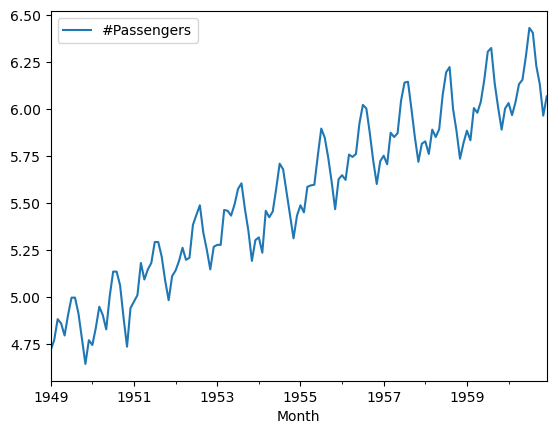

In [10]:
#logrithmic computation to make the time series stationary
first_log = np.log(data) # log transformation is actually a special case of the Box-Cox transformation when λ = 0;
first_log = first_log.dropna()#drop missing values
first_log.plot()

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

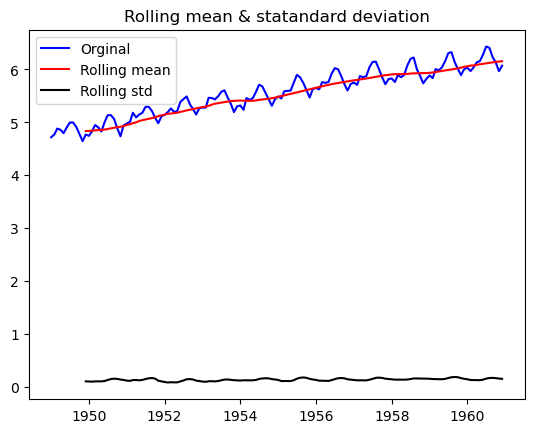

In [84]:
# rolling mean and standard deviation of the dataset
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [11]:
result=adfuller(first_log['#Passengers'])
result[1]

0.4223667747703916

we use two step

1-convert it into the log and check

2-second step is reduce the

In [ ]:
**Dropna() function is used for missing values.**

In [12]:
new_data=first_log-mean_log    # (actual - mean ) of reduced log scale
new_data=new_data.dropna()
new_data.head()

**Again we will check the stationarity of the dataset. The adfullar test checks for the presence of unit roots (indicative of non-stationarity) in the time series.**

In [13]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

print(result)

0.9921114303164102

In [16]:
# P< 0.05, so data is stationary now

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

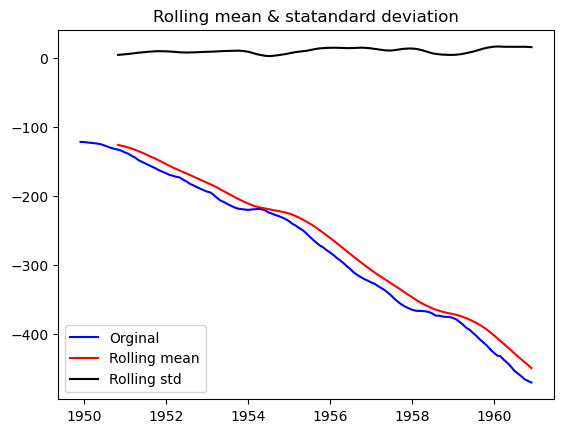

In [17]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
result = adfuller(new_data['#Passengers'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

print(result)


# The **seasonal decomposition** is a method used in time series analysis to represent a time series as a sum (or, sometimes, a product) of three components the **linear trend, the periodic (seasonal) component, and random residuals.**

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

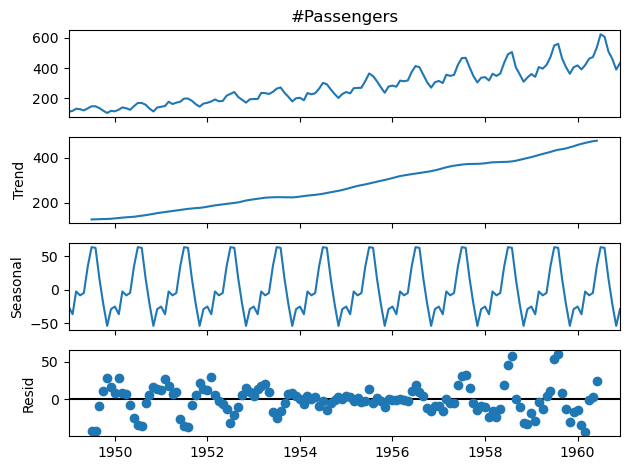

In [19]:
old_decompose=seasonal_decompose(data['#Passengers'].dropna())
old_decompose.plot();



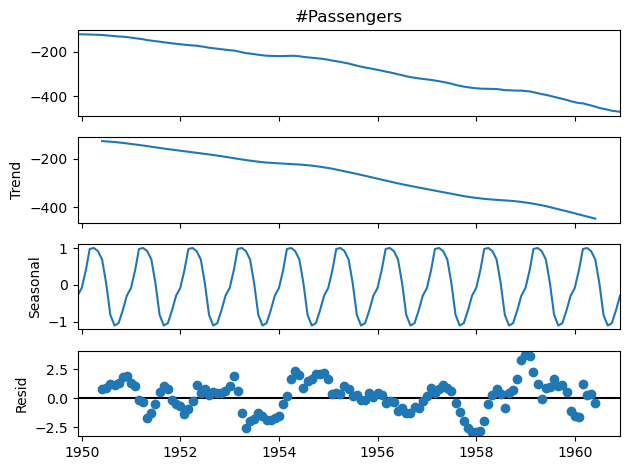

In [20]:

#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

# Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
pacf_plot=pacf(new_data, lags =10)


In [ ]:
acf_plot=acf(new_data)

**ARIMA** stands for **AutoRegressive Integrated Moving Average**.

The autoregressive integrated moving average model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables. The model's goal is to predict future securities or financial market moves by examining the differences between values in the series instead of through actual values.


An ARIMA model can be understood by outlining each of its components as follows:

**Autoregression (AR)**: refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

**Integrated (I):** represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

**Moving average (MA):**  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**ARIMA models are defined using the notation ARIMA(p, d, q). The order of the model, (p, d, q), is determined through analysis of the autocorrelation and partial autocorrelation functions of the time series data.**


**ARIMA Parameters:-**

**p: the number of lag observations in the model, also known as the lag order.**
**d: the number of times the raw observations are differenced; also known as the degree of differencing.**
**q: the size of the moving average window, also known as the order of the moving average.**

ARIMA model is defined with order (1, 0, 2) and fitted to the training data.

In [21]:
#ARIMA---AR+I+MA
#pdq
#p-autoregressive(AR)  .past data
#d-differencing(I)    .. to make data stationary
#q-moving average(MA)  -- past error

In [22]:
train_data=data.iloc[:120]['#Passengers']
test_data=data.iloc[120:]['#Passengers']

train_new=new_data.iloc[:120]['#Passengers']
test_new=new_data.iloc[120:]['#Passengers']

In [ ]:
# !pip install pmdarima
from pmdarima import auto_arima

In [ ]:
# auto_arima for ARIMA (non-seasonal)
arima_model=auto_arima(train_data,seasonal=False,trace=True) # done for original data

# trace = True gives stepwise details
# Akaike's Information Criterion (AIC), which was useful in selecting predictors for regression, 
# is also useful for determining the order of an ARIMA model.
# low AIC is better

In [ ]:
arima_model=auto_arima(train_new,seasonal=False,trace=True) # done for log transformed and differenced data

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_new,order=(3,0,2))  # order for tansformed and differenced data
model_fit=model.fit()
model_fit.summary() # summary provides all details of model

# here train test split is not in random, as data is in series. so train [:120], test [120:] in above data

In [ ]:
train

In [ ]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()


# Prediction is not accurate in this model
# predict(start=len(train),end=len(train)+len(test)-1  -- > -1 since index is considered

**ARIMA** models can be extended to **Seasonal ARIMA (SARIMA or Seasonal ARIMA)**, denoted as **SARIMA(p, d, q)(P, D, Q, s)**, where **(P, D, Q)** represent the **seasonal counterparts of (p, d, q)**, and **s represents the seasonality period.**

# with p = non-seasonal AR order, d = non-seasonal differencing, q = non-seasonal MA order, P = seasonal AR order, D = seasonal differencing, Q = seasonal MA order, and S = time span of repeating seasonal pattern.

# auto_arima for SARIMAX (seasonal + exogenous)


In [ ]:
# auto_arima for ARIMA (seasonal)
sarima_model=auto_arima(train_data,seasonal=True,trace=True, m=6) # done for original data, m= season
sarima_model.order
# pred = sarima_model.predict(n_periods = len(test))

In [ ]:
# auto_arima for ARIMA (seasonal)
sarima_model=auto_arima(train_new,seasonal=True,trace=True, m=6) # done for transformed data, m= season
sarima_model.order

For AirPassengers, the original dataset has no external regressors,  
for dataset with X, split X into train and test  

model = pm.auto_arima(
    train_y,
    X=train_X,
    seasonal=True,
    m=12,        # monthly seasonality
    stepwise=True,
    trace=True
)


In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

# Exogenous Regressors (X): Allows the inclusion of external variables that may affect the time series

In [48]:
model=SARIMAX(train_new,order=(3,0,2),seasonal_order=(3,0,2,6))    
model=model.fit()
# order=(p,d,q)
# seasonal_order=(P,D,Q,s)  s - seasonal period

C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stati

<Axes: xlabel='Month'>

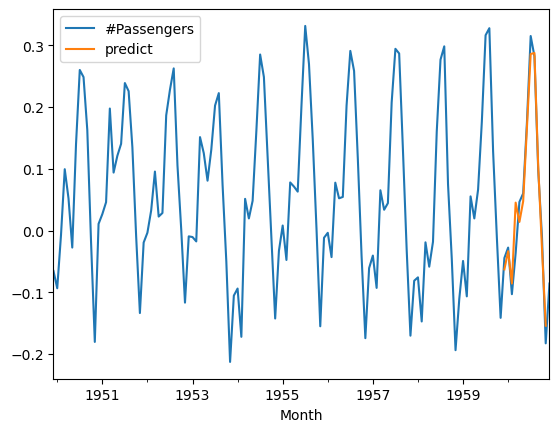

In [49]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

# prediction is accurate

**we can see that we are getting good results using SARIMA model. There is good match between input and predicted values.**

<Axes: xlabel='Month'>

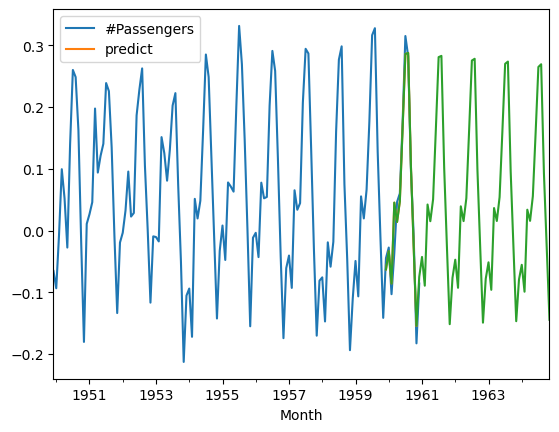

In [50]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=60)  # steps  = period of forecast ... here 60 = 12 months X 5
new_data.plot()
forecast.plot()

In [51]:
new_data.shape

(133, 2)

<Axes: xlabel='Month'>

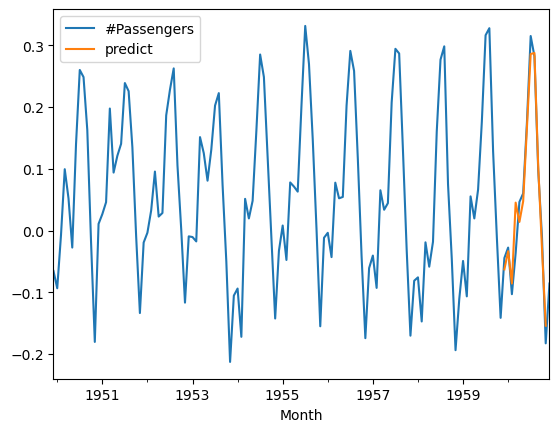

In [52]:
new_data.plot()

<Axes: >

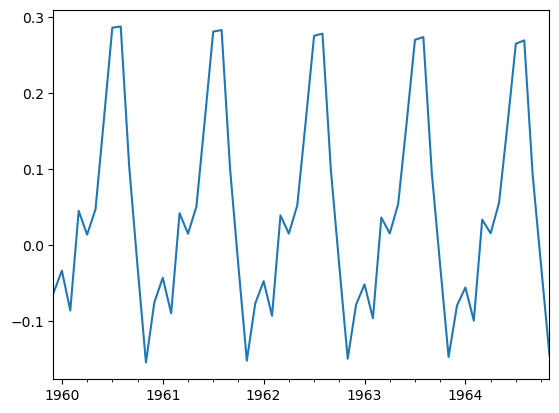

In [53]:
forecast.plot()

In [ ]:
# model code for getting foreasted value in origianl scale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# -------------------------------
# 1️⃣ Example: Original sales data
# -------------------------------
# Let's make up some sample monthly sales data
np.random.seed(42)
months = pd.date_range('2018-01-01', periods=60, freq='M')
sales = pd.Series(
    1000 + np.arange(60)*10 + np.random.normal(0, 50, 60),  # upward trend + noise
    index=months
)

plt.figure(figsize=(8, 3))
sales.plot(title='Original Sales')
plt.show()

# -------------------------------------
# 2️⃣ Log transform to stabilize variance
# -------------------------------------
log_sales = np.log(sales)

# -----------------------------------------
# 3️⃣ First differencing to remove the trend
# -----------------------------------------
diff_log = log_sales.diff().dropna()

# Check stationarity
result = adfuller(diff_log)
print(f"ADF Statistic: {result[0]:.3f}")
print(f"p-value: {result[1]:.3f}")
# If p-value < 0.05 → stationary ✅

plt.figure(figsize=(8, 3))
diff_log.plot(title='Log-Differenced Sales (stationary)')
plt.show()

# ---------------------------------
# 4️⃣ Fit ARIMA model on diff_log data
# ---------------------------------
model = auto_arima(
    diff_log,
    seasonal=False,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

# Forecast 12 future periods (still in differenced log scale)
forecast_diff_log = model.predict(n_periods=12)

# ----------------------------------------------------------
# 5️⃣ Invert transformations to get back to original sales
# ----------------------------------------------------------

# Step 1: Undo differencing (cumulative sum)
# Start from the last observed log value
last_log_value = log_sales.iloc[-1]
forecast_log = np.r_[last_log_value, forecast_diff_log].cumsum()
# np.r_[] is a NumPy shortcut for row-wise concatenation

# Step 2: Undo log transform
forecast_sales = np.exp(forecast_log)

# Step 3: Make a nice index for forecasts
forecast_index = pd.date_range(sales.index[-1] + pd.offsets.MonthEnd(1),
                               periods=12, freq='M')
forecast_series = pd.Series(forecast_sales[1:], index=forecast_index)

# -------------------------
# 6️⃣ Plot results together
# -------------------------
plt.figure(figsize=(10, 4))
plt.plot(sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecast (Original Scale)', color='orange')
plt.title("Sales Forecast in Original Scale")
plt.legend()
plt.show()

# ---------------------------
# 7️⃣ Print forecasted values
# ---------------------------
print("Forecasted Sales (original units):")
print(forecast_series.round(2))


####  for comparing all models  and find which has better accuracy.. this is not part of current file
!pip install pycaret


from pycaret.classification import * 

<!-- load your dataset -->

<!-- #setting up pycaret environment -->
clf_setup = setup(data , target= 'target variable') 
    
best_model = compare_models()
